# Exploratory Data Analysis: Unclean Data

to see what do

# Lib Loading

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

# Data Loading with a bit of transformation

In [83]:
df = pd.read_csv('./rumah123_data_single_raw_concated.csv')

In [84]:
# see harga column

df['Harga'].head()

0    Rp 1,5 Miliar
1    Rp 1,6 Miliar
2    Rp 3,1 Miliar
3    Rp 1,5 Miliar
4      Rp 600 Juta
Name: Harga, dtype: object

Insight: data is still in messy format

## Turning harga into integer

In [85]:
# check if there's any whitespace before or after
print([df['Harga'].iloc[100]])

['Rp 4,8 Miliar']


Insight = white space before the number

In [86]:
# remove the Rp and turn the comma to dots for easier multiplication later on
# remove whitespace

df['Harga'] = df['Harga'].str.replace('Rp','')
df['Harga'] = df['Harga'].str.replace(',','.')
df['Harga'] = df['Harga'].str.replace(' ','')

In [87]:
# see 
df.Harga.head()

0    1.5Miliar
1    1.6Miliar
2    3.1Miliar
3    1.5Miliar
4      600Juta
Name: Harga, dtype: object

We're going to turn these into 'Harga in million IDR' because house sales never go lower than millions. This makes seeing the data easier too.

In [88]:
# loop to turn miliar and juta into numerical value in millions of rupiah

harga_clean = []

for i in df['Harga']:
    if 'Miliar' in i:
        r = i.replace('Miliar','')
        r = float(r)
        r = r*10**3
        harga_clean.append(r)
    elif 'Juta' in i:
        r = i.replace('Juta','')
        r = float(r)
        harga_clean.append(r)

In [90]:
# let's compare with the df harga to see if it's correct

df['Harga'].head(10)

0    1.5Miliar
1    1.6Miliar
2    3.1Miliar
3    1.5Miliar
4      600Juta
5      795Juta
6    7.5Miliar
7      510Juta
8      850Juta
9    3.8Miliar
Name: Harga, dtype: object

In [91]:
print(f'{harga_clean[0]:,}')
print(f'{harga_clean[1]:,}')
print(f'{harga_clean[2]:,}')
print(f'{harga_clean[3]:,}')
print(f'{harga_clean[4]:,}')
print(f'{harga_clean[5]:,}')
print(f'{harga_clean[6]:,}')
print(f'{harga_clean[7]:,}')
print(f'{harga_clean[8]:,}')
print(f'{harga_clean[9]:,}')

1,500.0
1,600.0
3,100.0
1,500.0
600.0
795.0
7,500.0
510.0
850.0
3,800.0


Insight = accurate, price has been successfully transformed to numeric

In [92]:
#overwrite df Harga to the numerical value
df['Harga'] = harga_clean

In [93]:
# see change
df.Harga.head()

0    1500.0
1    1600.0
2    3100.0
3    1500.0
4     600.0
Name: Harga, dtype: float64

## Turning luas tanah and bangunan into integer

In [127]:
# print one just for me to know what string to replace

print([df['Luas Tanah'][1]])

[210]


Insight = erase m2 and white space

In [99]:
# replace the white spaces, get rid of m2, then turn to integer

df['Luas Tanah'] = df['Luas Tanah'].str.replace(' ','')
df['Luas Tanah'] = df['Luas Tanah'].str.replace('m²','')
df['Luas Tanah'] = df['Luas Tanah'].astype(int)

df['Luas Bangunan'] = df['Luas Bangunan'].str.replace(' ','')
df['Luas Bangunan'] = df['Luas Bangunan'].str.replace('m²','')
df['Luas Bangunan'] = df['Luas Bangunan'].astype(int)

In [100]:
# see change

df.head()

,Unnamed: 0,Judul,Harga,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,...,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan
0,0,RUMAH 2 LANTAI TENGAH KOTA PERUMAHAN BUKIT DAM...,1500.0,"Balikpapan Selatan, Balikpapan",5.0,3.0,144,207,1.0,Rumah,...,Tidak,Semi Furnished,2.0,Pemukiman Warga,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus,Dijual
1,0,"BALIKPAPAN, RUMAH CANTIK TENGAH KOTA (Y255)",1600.0,"Balikpapan Selatan, Balikpapan",3.0,2.0,210,176,NaN,Rumah,...,NaN,Semi Furnished,NaN,NaN,NaN,NaN,NaN,NaN,Bagus,Dijual
2,1,Rumah Luas Lokasi Strategis di Gunung Samarind...,3100.0,"Balikpapan Utara, Balikpapan",3.0,2.0,534,200,3.0,Rumah,...,Ya,NaN,1.0,NaN,Ya,NaN,PAM atau PDAM,Tidak,Bagus,Dijual
3,1,DUA RUMAH BERSEBELAHAN SATU SERTIFIKAT SIAP HUNI,1500.0,"Balikpapan Selatan, Balikpapan",5.0,4.0,193,150,NaN,Rumah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dijual
4,2,Rumah Minimalis Baru Renovasi Untuk Keluarga M...,600.0,"Balikpapan Utara, Balikpapan",2.0,2.0,80,140,1.0,Rumah,...,Ya,Semi Furnished,1.0,NaN,Ya,NaN,PAM atau PDAM,Tidak,Bagus,Dijual


Insight = Luas Tanah and Bangunan changed successfully

In [129]:
# see data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1413 non-null   int64  
 1   Judul                1413 non-null   object 
 2   Harga                1413 non-null   float64
 3   Lokasi               1413 non-null   object 
 4   Kamar Tidur          1362 non-null   float64
 5   Kamar Mandi          1361 non-null   float64
 6   Luas Tanah           1413 non-null   int32  
 7   Luas Bangunan        1413 non-null   int32  
 8   Carport              253 non-null    float64
 9   Tipe Properti        1413 non-null   object 
 10  Sertifikat           1412 non-null   object 
 11  Daya Listrik         1362 non-null   object 
 12  Kamar Pembantu       242 non-null    float64
 13  Dapur                228 non-null    float64
 14  Ruang Makan          696 non-null    object 
 15  Ruang Tamu           698 non-null    o

In [105]:
# turn to csv for future use?

df.to_csv('./format_bener_raw_rumah123_data_single_raw_concated.csv', index=False)

# Data Exploration and Cleaning

In [148]:
# load plotter

# make numerical plotter

def diagnostic_plots(df1, variable):
    # Print skew value
    print(f'Skewness value of {variable}: {df1[variable].skew()}')
    # Print Mean and Std dev
    print(f'Mean value of {variable} is {statistics.mean(df1[variable])}')
     # Print IQR Outlier
    q3, q1 = np.percentile(df1[variable], [75, 25])
    iqr = q3 - q1
    print(f'First Quartile is {q1}, Third Quartile is {q3}, IQR is {iqr}, and 3xIQR is {3*iqr}')
    print(f'Outliers will be removed are those below {q1-(3*iqr)} and higher than {q3+(3*iqr)}')

   
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=30)
    plt.title(f'Histogram of {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[variable])
    plt.title(f'Boxplot of {variable}')

    plt.show()

# make categorical plotter
    
def diagnostic_plots_categ(df1, variable):

    # Define figure size
    plt.figure(figsize=(20, 10))

    # Barh
    plt.subplot(1, 2, 1)
    df1[variable].value_counts().sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Bar chart of {variable}')

    # Pie plot
    plt.subplot(1, 2, 2)
    df1[variable].value_counts().sort_values(ascending=True).plot(kind = 'pie', autopct="%.1f%%")
    plt.title(f'Pie chart of {variable}')

    plt.show()

## Check sum of empty data

In [4]:
#check empty fields
df.isna().sum()

Unnamed: 0                0
Judul                     0
Harga                     0
Lokasi                    0
Kamar Tidur              51
Kamar Mandi              52
Luas Tanah                0
Luas Bangunan             0
Carport                1160
Tipe Properti             0
Sertifikat                1
Daya Listrik             51
Kamar Pembantu         1171
Dapur                  1185
Ruang Makan             717
Ruang Tamu              715
Kondisi Perabotan      1029
Jumlah Lantai          1013
Pemandangan            1081
Terjangkau Internet     716
Lebar Jalan            1093
Sumber Air             1082
Hook                    716
Kondisi Properti        918
Tipe Iklan                0
dtype: int64

Insight : a lot of empties on carport, kamar pembantu, dapur, kondisi perabotan, jumlah lantai, pemandangan, jangkauan internet, lebar jalan, sumber air, hook, dan kondisi properti

These are additional information that the users of this website most likely did not bother to fill.

## Empty number-of-room information

Context = it's really weird to see house listing with no information on how many bedroom and bathroom are there, as these are crucial for a buyer to choose a house. Before we decide further what to do with these empty columns, let's investigate if there are any pattern that may tell us why these columns are empty.

In [122]:
# separate the empty ones

df_empty_bedroom = df[df['Kamar Tidur'].isnull()]

In [123]:
# show data

df_empty_bedroom.head()

,Unnamed: 0,Judul,Harga,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,...,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan
6,3,Rumah Mewah design minimalis siap huni Cluster...,7500.0,"Balikpapan Baru, Balikpapan",NaN,NaN,300,300,NaN,Rumah,...,NaN,Furnished,1.0,NaN,NaN,NaN,NaN,NaN,Bagus,Dijual
41,20,rumah besar dengan tanah luas di tengah kota .,9500.0,"Balikpapan Kota, Balikpapan",NaN,NaN,1195,600,NaN,Rumah,...,Tidak,NaN,1.0,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Bagus,Dijual
42,21,Rumah minimalis 2.5 lantai di balikpapan baru,2500.0,"Balikpapan Baru, Balikpapan",NaN,NaN,165,250,NaN,Rumah,...,Tidak,NaN,1.0,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Bagus,Dijual
48,24,Rumah Nyaman Dalam Cluster,900.0,"Balikpapan Utara, Balikpapan",NaN,NaN,189,120,NaN,Rumah,...,Tidak,NaN,1.0,NaN,Ya,2 Mobil,Sumur Bor,Tidak,Sudah Renovasi,Dijual
50,25,Rumah Asri Tanah Ngantong,1500.0,"Balikpapan Utara, Balikpapan",NaN,NaN,230,240,NaN,Rumah,...,Tidak,NaN,1.0,NaN,Ya,2 Mobil,Sumur Bor,Ya,Sudah Renovasi,Dijual


In [107]:
# see how many data

df_empty_bedroom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 6 to 1363
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           51 non-null     int64  
 1   Judul                51 non-null     object 
 2   Harga                51 non-null     float64
 3   Lokasi               51 non-null     object 
 4   Kamar Tidur          0 non-null      float64
 5   Kamar Mandi          3 non-null      float64
 6   Luas Tanah           51 non-null     object 
 7   Luas Bangunan        51 non-null     object 
 8   Carport              1 non-null      float64
 9   Tipe Properti        51 non-null     object 
 10  Sertifikat           51 non-null     object 
 11  Daya Listrik         50 non-null     object 
 12  Kamar Pembantu       0 non-null      float64
 13  Dapur                12 non-null     float64
 14  Ruang Makan          48 non-null     object 
 15  Ruang Tamu           48 non-null     object 


Insight = 51 entries of empty bedroom column

In [106]:
# see if the kamar mandi is also null

df_empty_bedroom['Kamar Mandi'].value_counts()

Kamar Mandi
4.0    3
Name: count, dtype: int64

### Price check

Insight = 3 entries list their bathrooms as 4

Let's see the price distribution next

Skewness value of Harga: 6.21255393332728
Mean value of Harga is 3143.9803921568628
First Quartile is 975.0, Third Quartile is 3250.0, IQR is 2275.0, and 3xIQR is 6825.0
Outliers will be removed are those below -5850.0 and higher than 10075.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


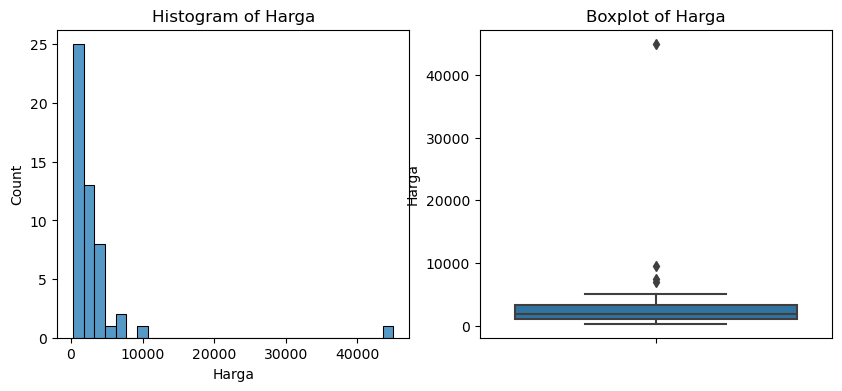

In [149]:
diagnostic_plots(df_empty_bedroom, 'Harga')

Insight = price does not seem to have any pattern unique to null bedroom listing, let's compare to the whole dataset.

Skewness value of Harga: 32.490687082787545
Mean value of Harga is 2359.5484784147206
First Quartile is 875.0, Third Quartile is 2500.0, IQR is 1625.0, and 3xIQR is 4875.0
Outliers will be removed are those below -4000.0 and higher than 7375.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


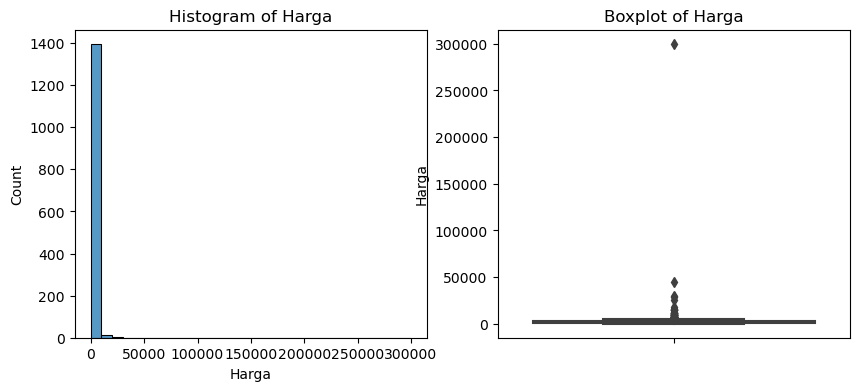

In [150]:
diagnostic_plots(df, 'Harga')

Insight = similar spread where **mostly sticks near zero**. Let's check if they're really the same with t-test.

In [112]:
# H0: average is same/similar
# H1: average is not same/similar

t_stat, p_val = stats.ttest_ind(df_empty_bedroom['Harga'],df['Harga'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 0.6652680270542067
P-value: 0.5059840093159025


Insight = t-test shows p-value of > 0.05, meaning the means are different between the empty bedroom and the overall data. This is due to how the overall data has more lower-priced houses proportionally compared to the empty bedroom data. 

This might mean that the null fields bedroom are those of higher prices?

### Area of land and building check

Skewness value of Luas Tanah: 3.9774477947127727
Mean value of Luas Tanah is 298.7647058823529
First Quartile is 139.5, Third Quartile is 307.0, IQR is 167.5, and 3xIQR is 502.5
Outliers will be removed are those below -363.0 and higher than 809.5


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


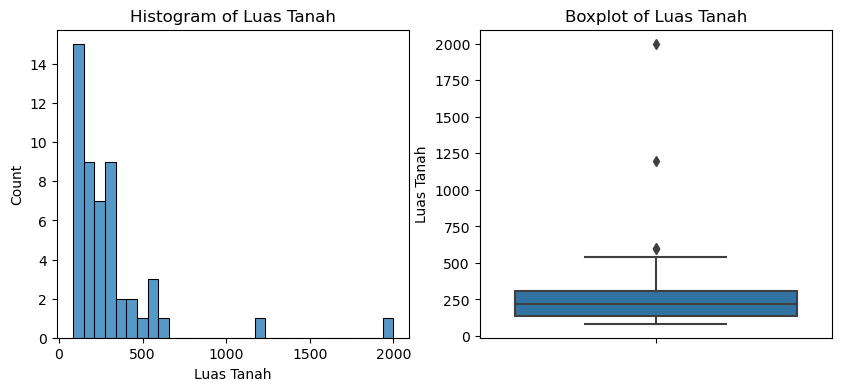

Skewness value of Luas Tanah: 35.69227904382573
Mean value of Luas Tanah is 271.5180467091295
First Quartile is 120.0, Third Quartile is 268.0, IQR is 148.0, and 3xIQR is 444.0
Outliers will be removed are those below -324.0 and higher than 712.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


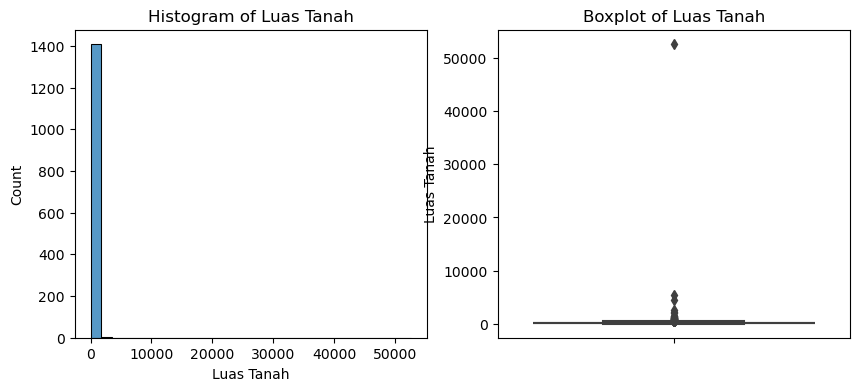

In [152]:
diagnostic_plots(df_empty_bedroom, 'Luas Tanah')
diagnostic_plots(df, 'Luas Tanah')

Skewness value of Luas Bangunan: 4.551490783405625
Mean value of Luas Bangunan is 263.84313725490193
First Quartile is 100.0, Third Quartile is 250.0, IQR is 150.0, and 3xIQR is 450.0
Outliers will be removed are those below -350.0 and higher than 700.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


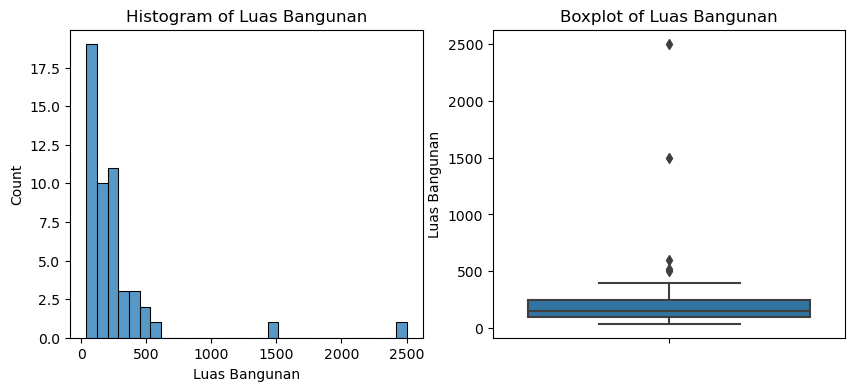

Skewness value of Luas Bangunan: 35.4835167813167
Mean value of Luas Bangunan is 203.39631988676575
First Quartile is 85.0, Third Quartile is 226.0, IQR is 141.0, and 3xIQR is 423.0
Outliers will be removed are those below -338.0 and higher than 649.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


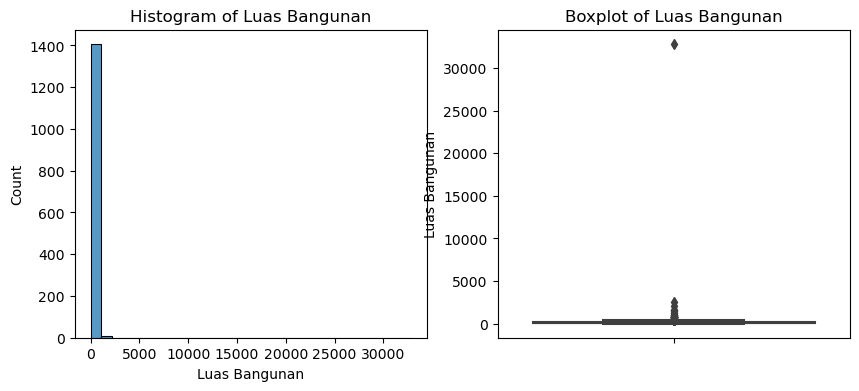

In [151]:
diagnostic_plots(df_empty_bedroom, 'Luas Bangunan')
diagnostic_plots(df, 'Luas Bangunan')

Insight = similar with price, the difference distribution of empty bedroom data and population data is hard to see as the there are really high outliers that makes the spread less visible. Though, the distribution of **sticking mostly to zero** is apparent in both plots.

In [137]:
print('Luas Tanah')
t_stat, p_val = stats.ttest_ind(df_empty_bedroom['Luas Tanah'],df['Luas Tanah'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)


# luas bangunan
print('Luas Bangunan')
t_stat, p_val = stats.ttest_ind(df_empty_bedroom['Luas Bangunan'],df['Luas Bangunan'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

Luas Tanah
T-Statistic: 0.13696704858532852
P-value: 0.8910756996128768
Luas Bangunan
T-Statistic: 0.4854723687773111
P-value: 0.6274140496182048


Insight = there are also difference in mean of the no_bedroom and whole data. This is again due to the sheer numbers of relatively smaller houses in the whole dataset compared to the no_bedroom sample.

THe author thinks there's not going to be any insightful outcome from comparing the averages because of said issue.

#### Side track: check the outliers of area of land and building

If we follow IQR outlier rule, a lot of... just big houses would be marked as outliers, so further investigation is needed. Though there are some extreme outliers that piqued the author's mind.

In [145]:
df[df['Luas Tanah'] > 15000]

,Unnamed: 0,Judul,Harga,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,...,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan
38,19,RUMAH/VILLA/COTAGE /KEBUN BUAH SANGAT LUAS,1.0,"Balikpapan Utara, Balikpapan",10.0,6.0,52630,1000,NaN,Rumah,...,Tidak,NaN,1.0,NaN,Tidak,NaN,PAM atau PDAM,Tidak,NaN,Dijual


Insight  = upon checking the data manually by opening the website, it seems that the poster is posting false price as the amount of land sold and the price does not make any sense.

The land was advertised as 100 m x 500 m in an image on the webpage. Written in the description, the seller is in dire need of cash, and were willing to sell for IDR 450,000/m2, which means the price would be over 22,5 billion IDR.

But who would bother with a listing that says 22.5 Billion IDR right? It won't gain the attention that the seller needed.

This listing is for land **plus** other buildings tho, so it shouldn't belong in the house dataset.

The author is advising to just drop this one outlier.

In [147]:
df[df['Luas Bangunan'] > 30000]

,Unnamed: 0,Judul,Harga,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,...,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan
1292,1345,Jual Cepat Hotel Menara Bahtera Di Kalimantan ...,300000.0,"Balikpapan Timur, Balikpapan",99.0,99.0,5363,32835,NaN,Rumah,...,Ya,Furnished,19.0,Perkotaan,Ya,2 Mobil,Sumur Galian,Tidak,Bagus,Dijual


Insight =

Can you really call a hotel a house?

This outlier should be removed from the house listing dataset.

### Comparing categorical features

#### Sertifikat

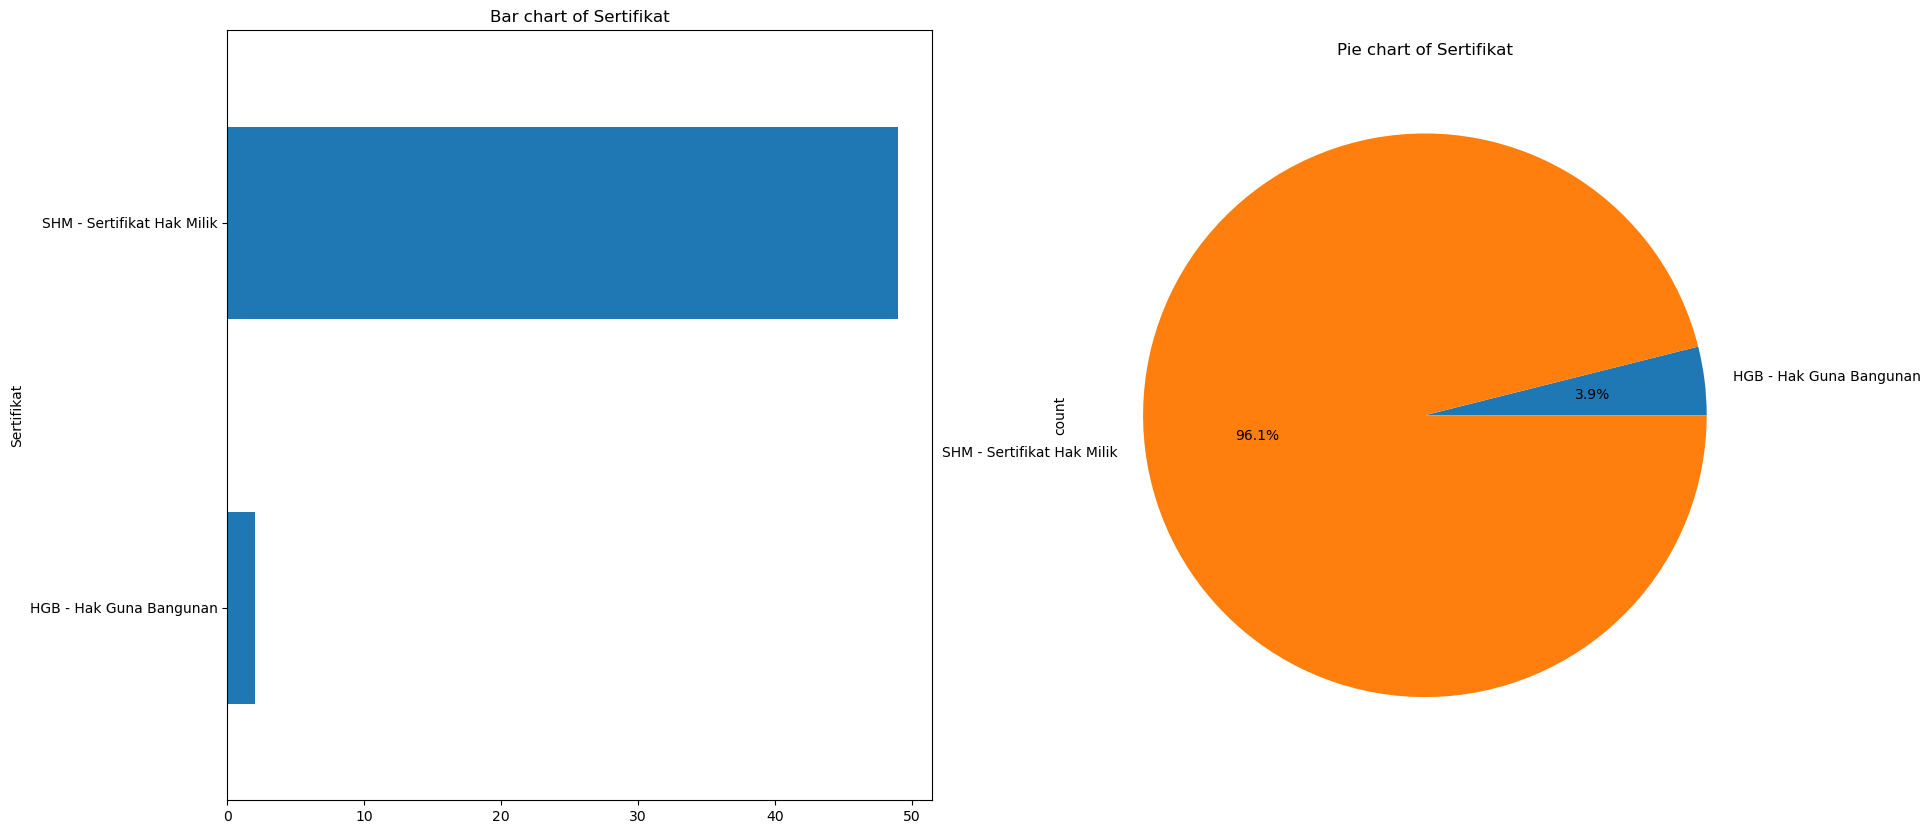

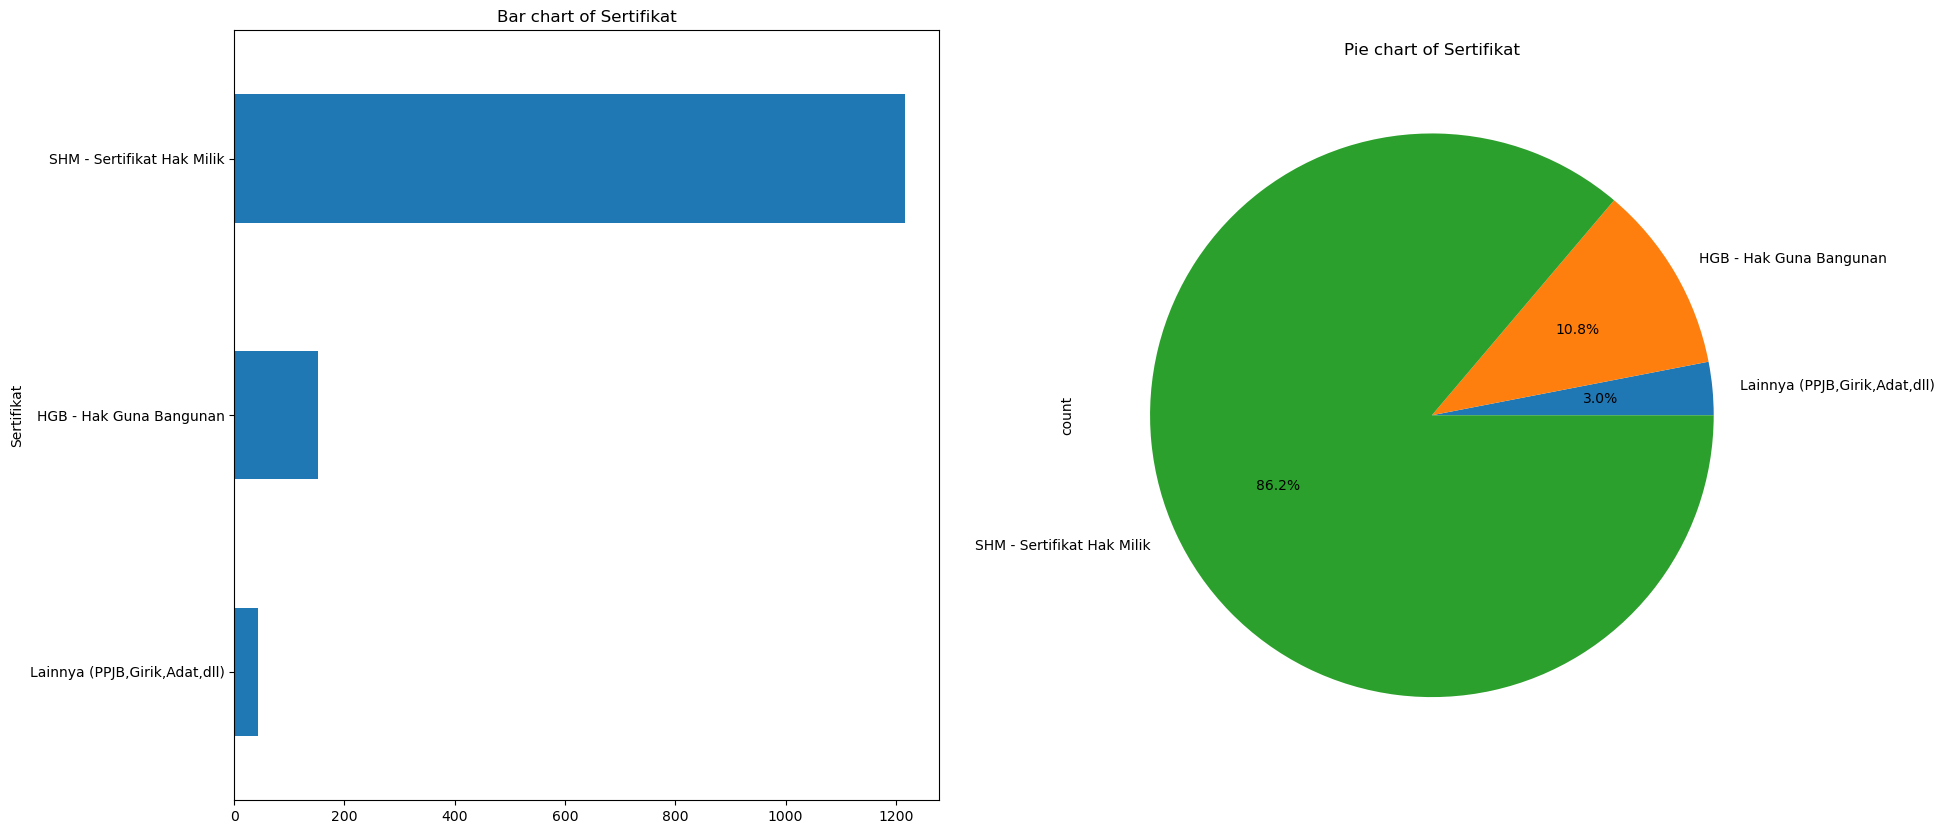

In [139]:
diagnostic_plots_categ(df_empty_bedroom, 'Sertifikat')
diagnostic_plots_categ(df, 'Sertifikat')

Insight = not different, **both have SHM as highest frequency followed by HGB**

#### Lokasi

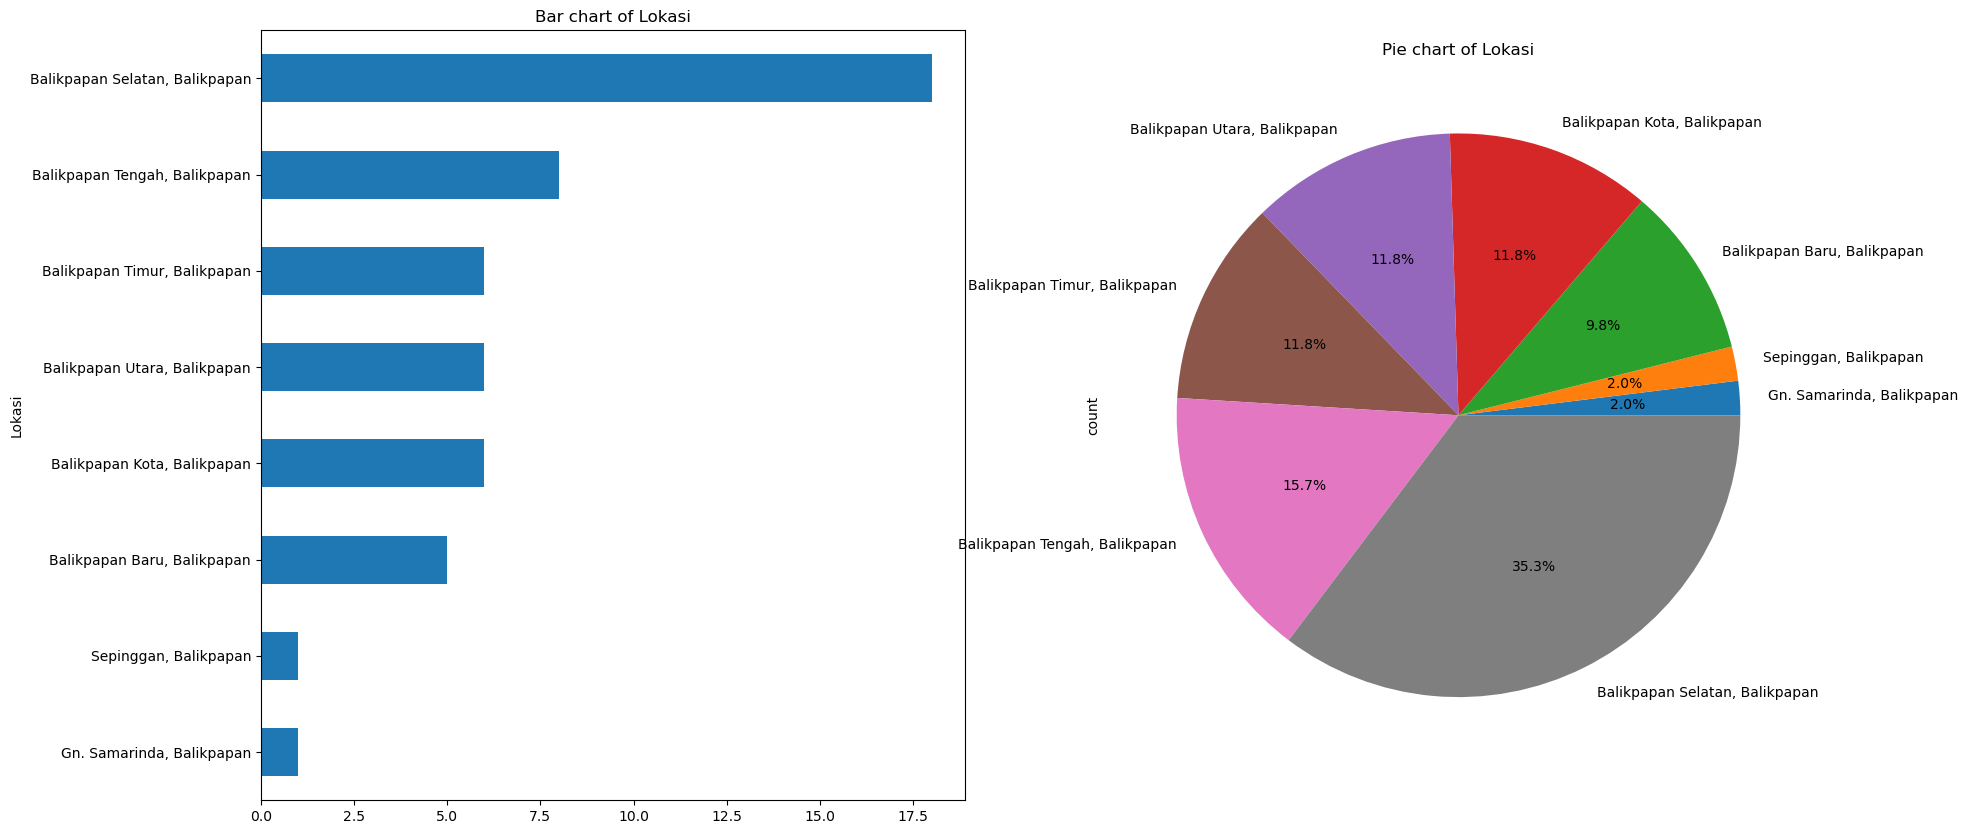

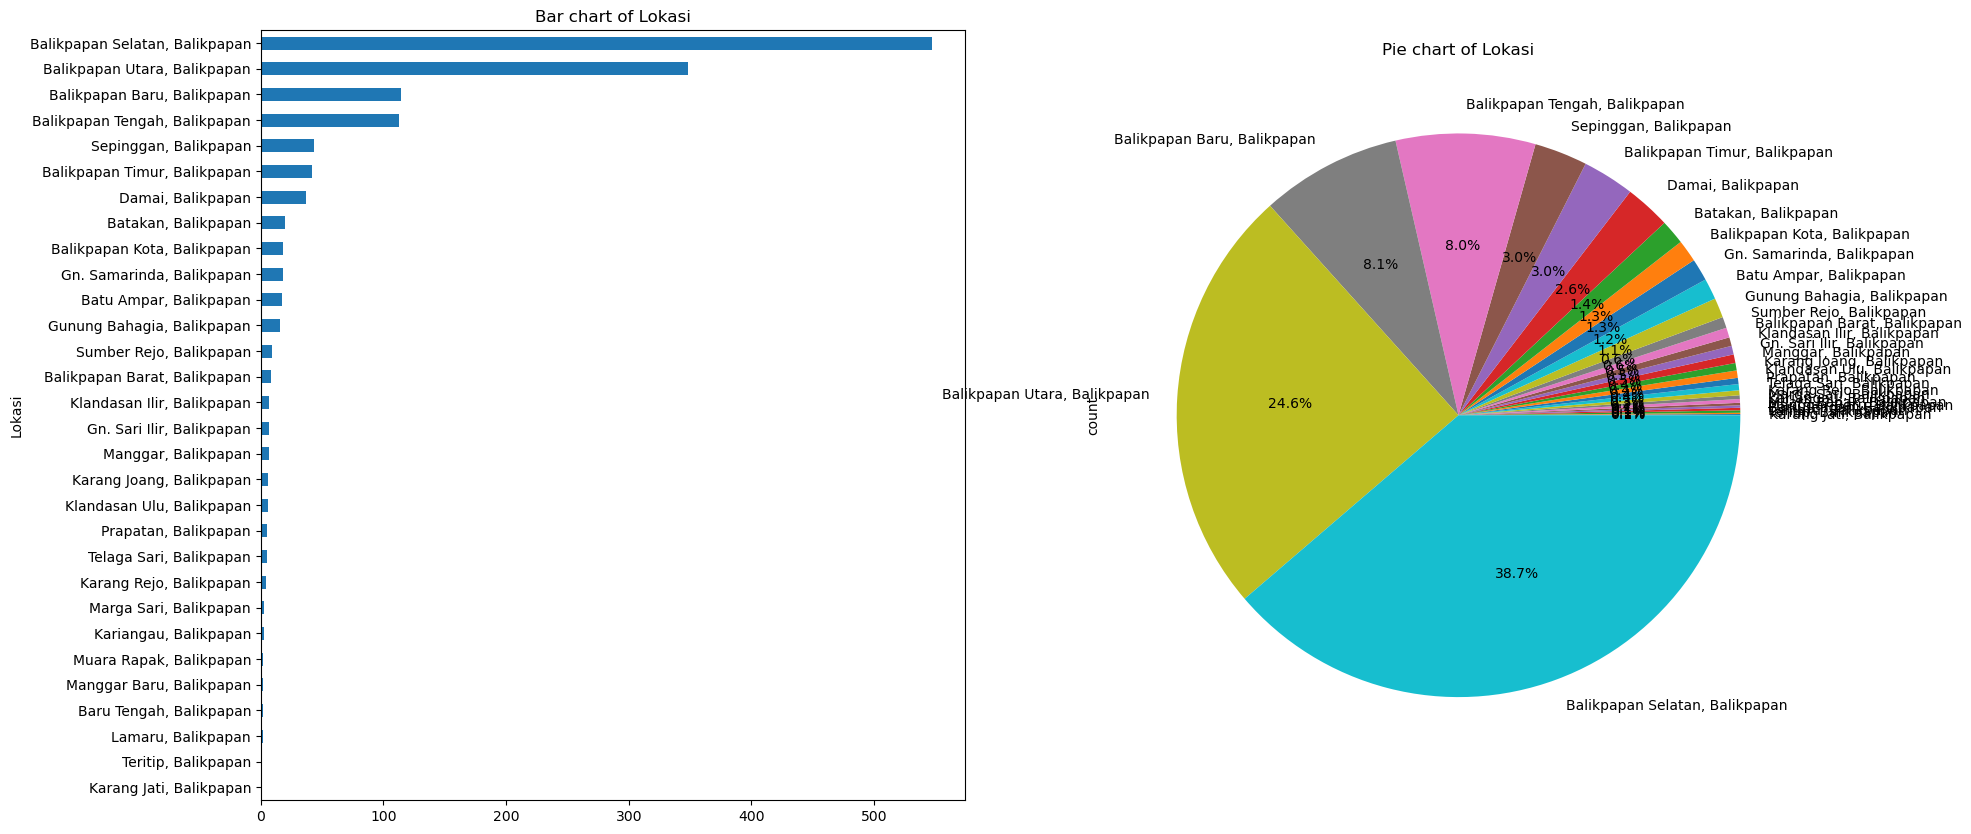

In [140]:
diagnostic_plots_categ(df_empty_bedroom, 'Lokasi')
diagnostic_plots_categ(df, 'Lokasi')

Insight = not much indication of difference or pattern from the location point of view too. **In both data they stay within mostly 'Balikpapan Selatan, Utara, Tengah, Baru, Timur'**

This plot also shows us that the location with the most listing is Balikpapan Selatan, followed by Utara, and Baru.

#### Daya Listrik

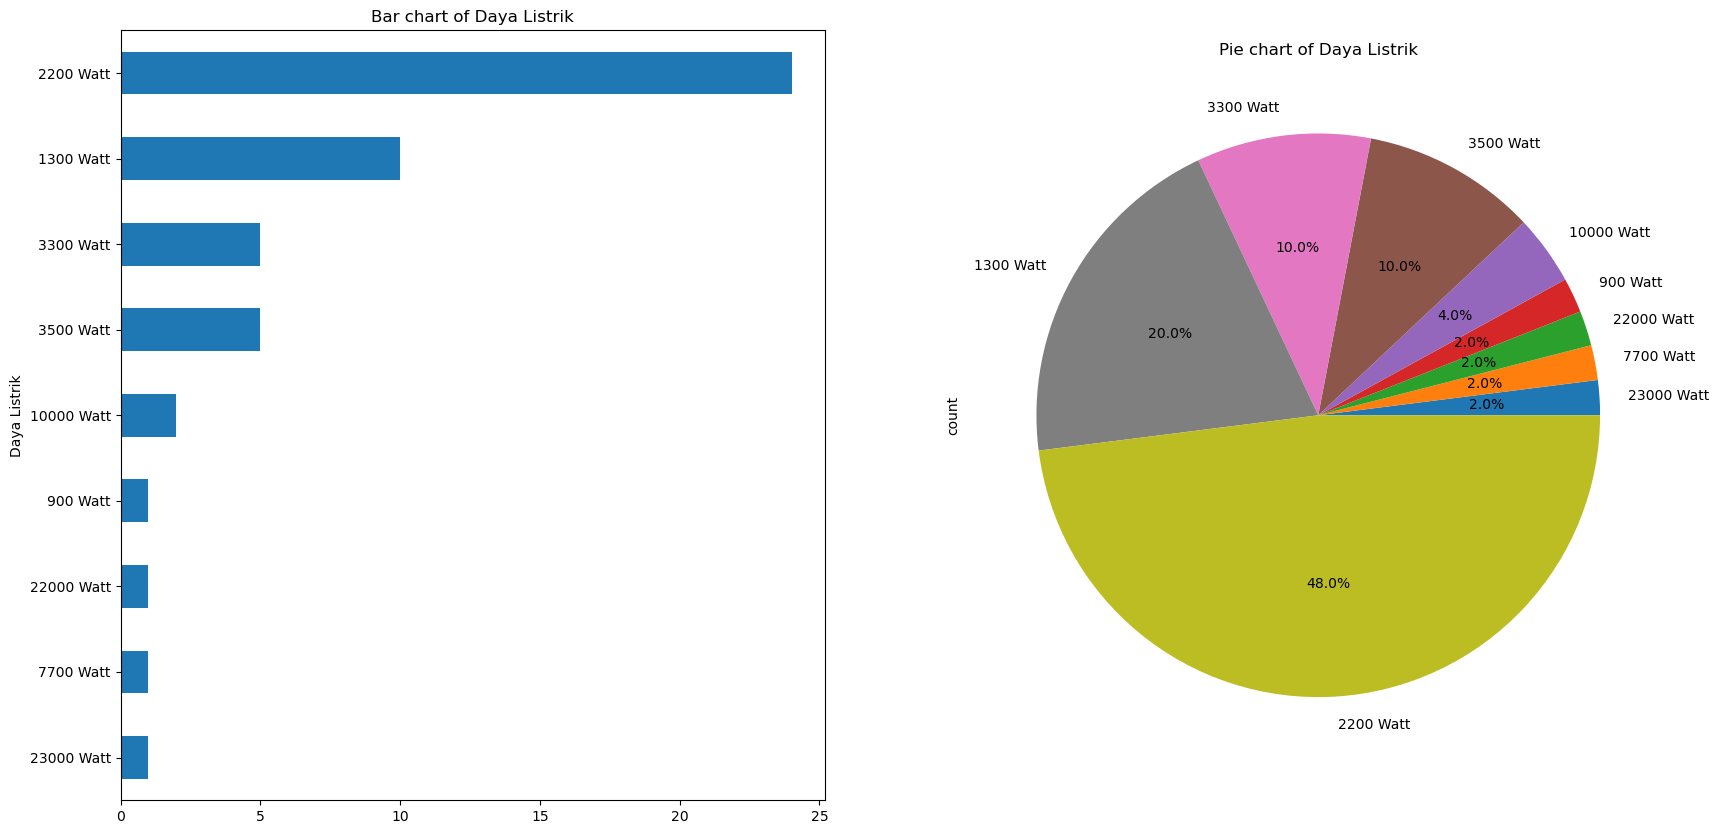

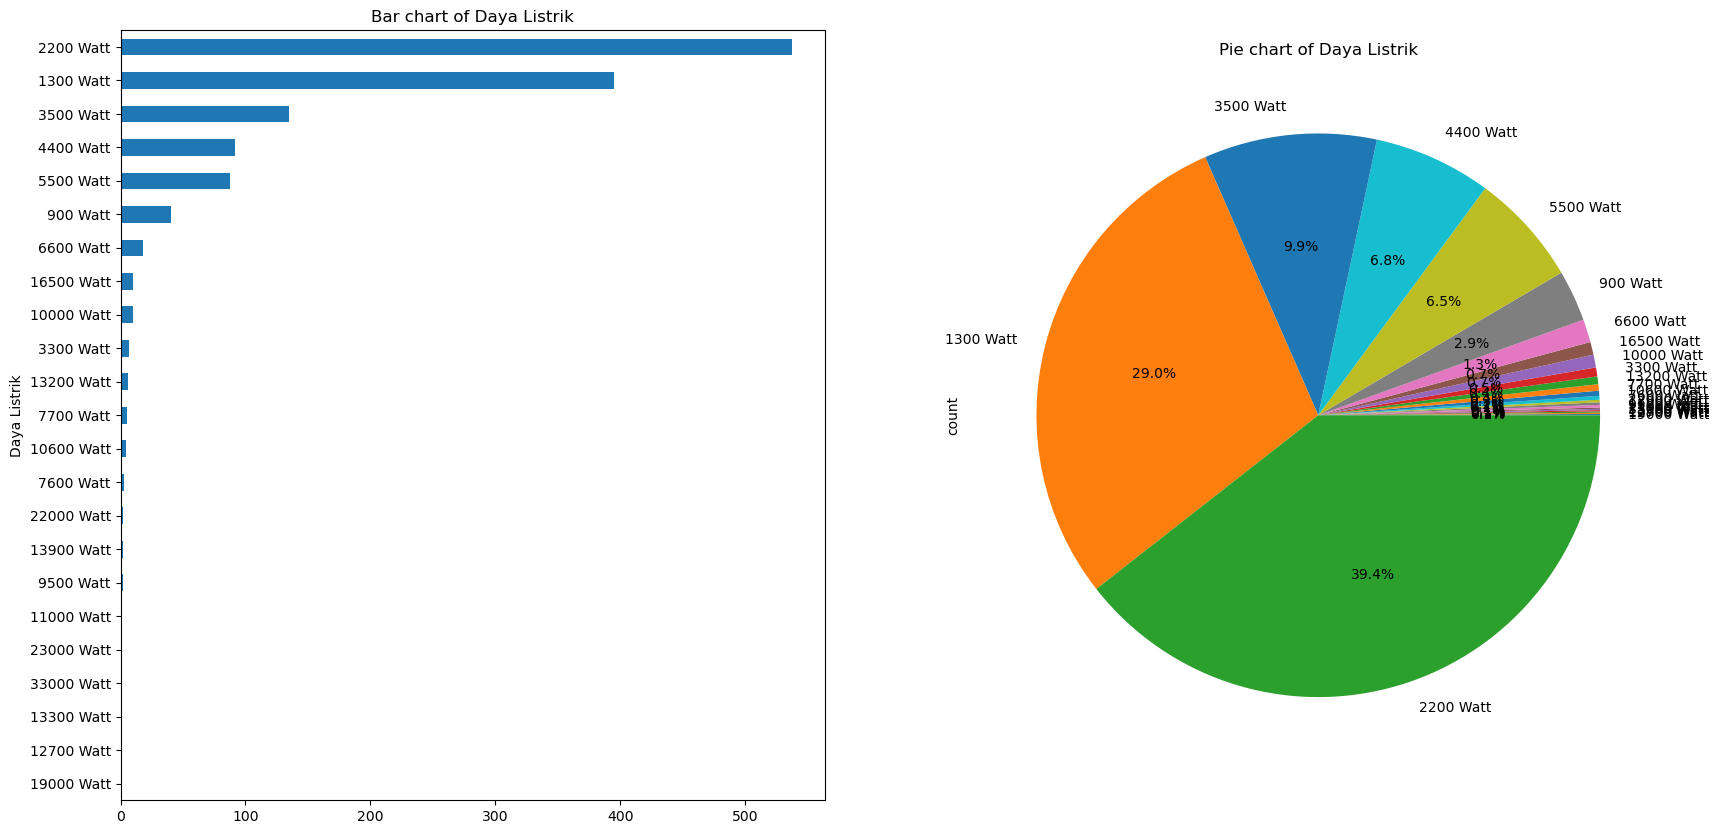

In [142]:
diagnostic_plots_categ(df_empty_bedroom, 'Daya Listrik')
diagnostic_plots_categ(df, 'Daya Listrik')

Insight = not much different as the **most frequent wattage in both data is 2200 and 1300** 

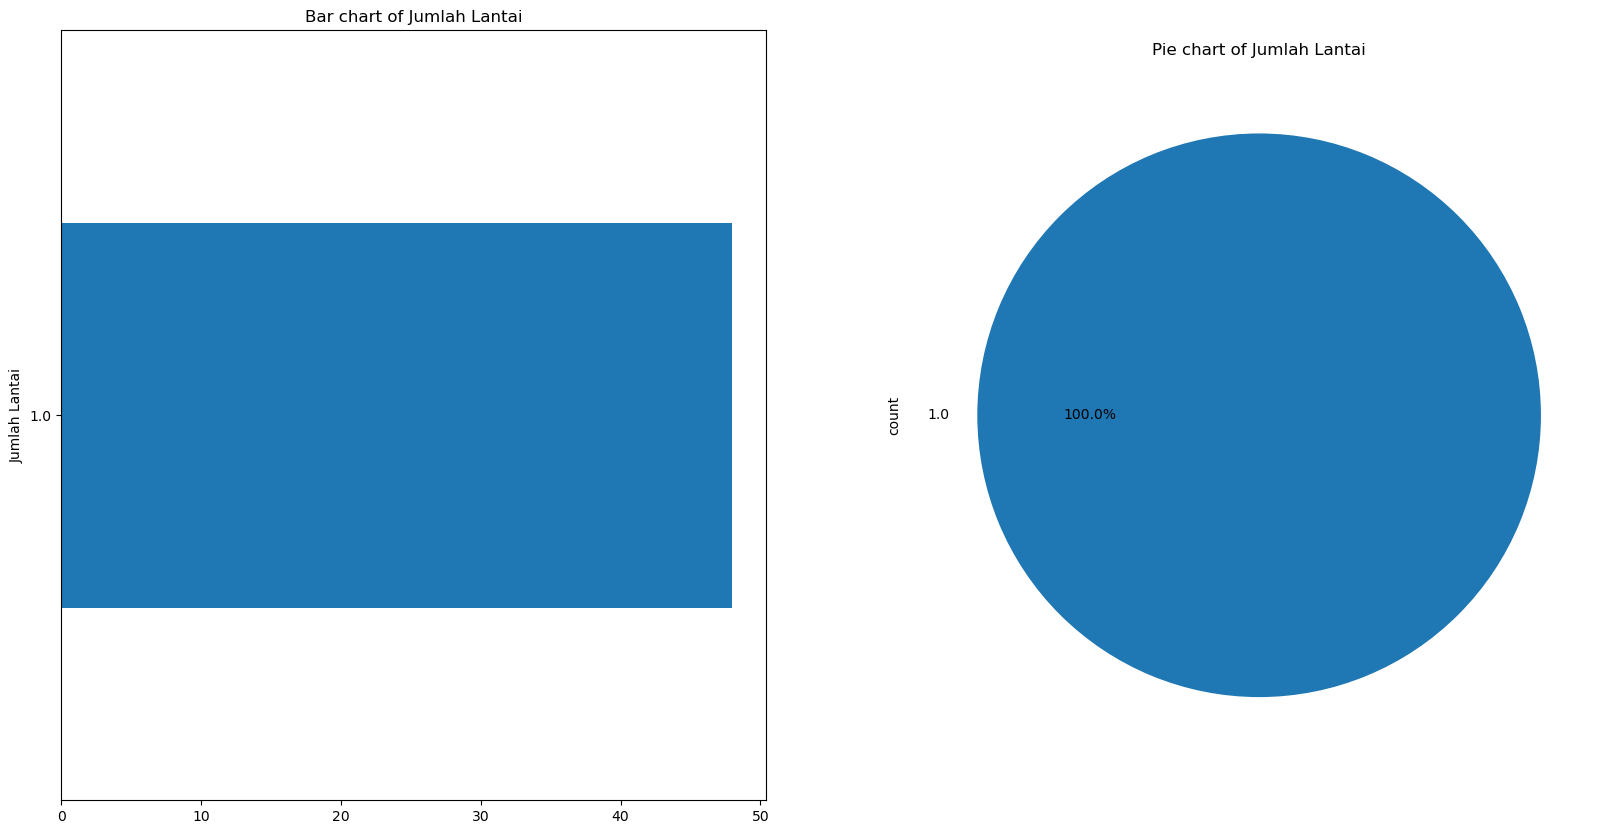

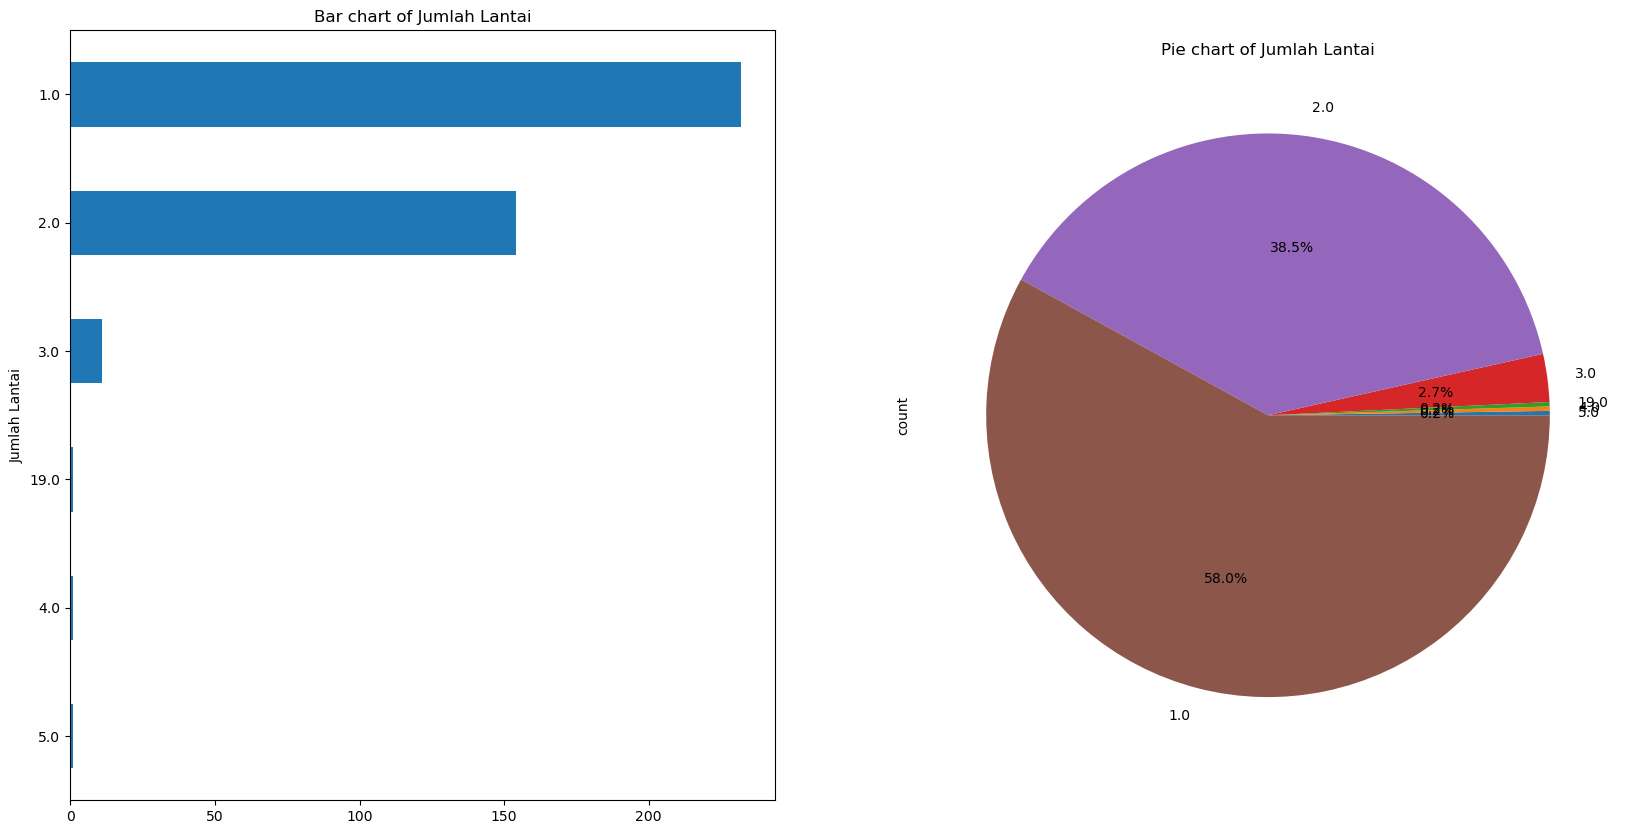

In [143]:
diagnostic_plots_categ(df_empty_bedroom, 'Jumlah Lantai')
diagnostic_plots_categ(df, 'Jumlah Lantai')

Insight = all bedroom_null data is of 1 floor houses, but this can be just a sampling luck as the whole dataset has over 58% 1 story houses.

### Conclusion

The missing data are not related to any other variable. The dataset with empty number-of-bedroom information have similar spreads in many numerical and categorical features.

**Therefore, we can conclude that the missing info of number of bedroom is Missing Completely At Random (MCAR)**

# Momentary Conclusion: 4th of February 2024, 23:45:

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1413 non-null   int64  
 1   Judul                1413 non-null   object 
 2   Harga                1413 non-null   float64
 3   Lokasi               1413 non-null   object 
 4   Kamar Tidur          1362 non-null   float64
 5   Kamar Mandi          1361 non-null   float64
 6   Luas Tanah           1413 non-null   int32  
 7   Luas Bangunan        1413 non-null   int32  
 8   Carport              253 non-null    float64
 9   Tipe Properti        1413 non-null   object 
 10  Sertifikat           1412 non-null   object 
 11  Daya Listrik         1362 non-null   object 
 12  Kamar Pembantu       242 non-null    float64
 13  Dapur                228 non-null    float64
 14  Ruang Makan          696 non-null    object 
 15  Ruang Tamu           698 non-null    o

The main insight of this unclean/raw data is that:

- Most data is heavily skewed, including the target variable, Price, so linear regression is not advised. There exist an advice that we'll need to log-transform the data first to achieve normal distribution, but this then changes the interpretation of the regression model.

- There seems to be outliers in prices and area of land and building. Upon inspection of outliers, some are really oddballs that does not belong. Further inspection of outliers are needed to be able to make a decision with confidence.

- The aforementioned author's guest that the missing/empty data are just... simply not filled in by the sellers (we all know how diligent Indonesians in general are in following instructions and filling in forms), the hypothesis that the missing values are just **Missing Values Completely at Random** is not proven to be false yet. Further inspection into each column's missing values, trying to figure out why, is needed. Or perhaps method to deal with overwhelmingly empty column is needed. Perhaps drop the mostly empty column as, even if we fill it in with imputation and whatnot, it won't really tell the story of how price moves with the variable anyway.